# About Dataset

I'm a data scientist at a financial company. I have the financial status data of several companies and would like to make a profile of those companies in **2018**.

**Features:**
1. `Year`
2. `Company`: Company Name in accordance with the stock market
3. `Category `: Category of the company
4. `Market Cap` : market capitalization is the total value of a company's outstanding shares in **Billion USD**.
5. `Revenue`: Revenue in **Million USD**
6. `Gross Profit`: in **Million USD**
7. `Net Income`: in **Million USD**
8. `Earning Per Share`: in USD
9. `Net Profit Margin`: in %
10. `Number of Employees`

# Data Understanding

In [1483]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [1484]:
df = pd.read_csv("financial_data.csv")
df.head()

,Unnamed: 0,Year,Company,Category,Market Cap(in B USD),Revenue,Gross Profit,Net Income,Earning Per Share,Net Profit Margin,Number of Employees
0,0,2022,AAPL,IT,2066.94,394328.0,170782.0,99803.0,6.11,25.3096,164000
1,1,2021,AAPL,IT,2913.28,365817.0,152836.0,94680.0,5.61,25.8818,154000
2,2,2020,AAPL,IT,2255.97,274515.0,104956.0,57411.0,3.28,20.9136,147000
3,3,2019,AAPL,IT,1304.76,260174.0,98392.0,55256.0,2.97,21.2381,137000
4,4,2018,AAPL,IT,748.54,265595.0,101839.0,59531.0,2.98,22.4142,132000


In [1485]:
df['Year'].value_counts()

2018    12
2017    12
2016    12
2015    12
2014    12
2022    11
2021    11
2020    11
2019    11
2013    11
2012    11
2011    11
2010    11
2009    11
2023     2
Name: Year, dtype: int64

In [1486]:
df = df[df['Year'] == 2018].copy()

The primary objective is to construct company profiles specifically for the year **2018**. Consequently, I've refined the dataset by applying a filter to exclusively extract data corresponding to that particular year, disregarding extraneous temporal information.

In [1487]:
df.head(15)

,Unnamed: 0,Year,Company,Category,Market Cap(in B USD),Revenue,Gross Profit,Net Income,Earning Per Share,Net Profit Margin,Number of Employees
4,4,2018,AAPL,IT,748.54,265595.00,101839.00,59531.000,2.9800,22.4142,132000
19,19,2018,MSFT,IT,779.67,110360.00,72007.00,16571.000,2.1300,15.0154,131000
33,33,2018,GOOG,IT,719.63,136819.00,77270.00,30736.000,2.1850,22.4647,98771
47,47,2018,PYPL,FinTech,99.09,15451.00,7189.00,2057.000,1.7100,13.3131,21800
56,56,2018,AIG,Bank,34.86,47389.00,6921.00,-6.000,-0.0100,-0.0127,49600
70,70,2018,PCG,Manufacturing,5.75,16759.00,12260.00,-6851.000,-13.2500,-40.8795,24000
80,80,2018,SHLDQ,Finance,0.04,16702.00,3527.00,-383.000,-3.5700,-2.2931,89900
94,94,2018,MCD,FOOD,148.82,21257.90,10832.60,5924.300,7.5400,27.8687,210000
108,108,2018,BCS,BANK,31.68,28212.33,28212.33,1860.711,0.4912,7.0877,83500
123,123,2018,NVDA,ELEC,81.44,9714.00,5822.00,3047.000,1.2050,31.3671,11528


In [1488]:
df.drop(['Unnamed: 0', 'Year'], axis=1, inplace=True)
df.head(15)

,Company,Category,Market Cap(in B USD),Revenue,Gross Profit,Net Income,Earning Per Share,Net Profit Margin,Number of Employees
4,AAPL,IT,748.54,265595.00,101839.00,59531.000,2.9800,22.4142,132000
19,MSFT,IT,779.67,110360.00,72007.00,16571.000,2.1300,15.0154,131000
33,GOOG,IT,719.63,136819.00,77270.00,30736.000,2.1850,22.4647,98771
47,PYPL,FinTech,99.09,15451.00,7189.00,2057.000,1.7100,13.3131,21800
56,AIG,Bank,34.86,47389.00,6921.00,-6.000,-0.0100,-0.0127,49600
70,PCG,Manufacturing,5.75,16759.00,12260.00,-6851.000,-13.2500,-40.8795,24000
80,SHLDQ,Finance,0.04,16702.00,3527.00,-383.000,-3.5700,-2.2931,89900
94,MCD,FOOD,148.82,21257.90,10832.60,5924.300,7.5400,27.8687,210000
108,BCS,BANK,31.68,28212.33,28212.33,1860.711,0.4912,7.0877,83500
123,NVDA,ELEC,81.44,9714.00,5822.00,3047.000,1.2050,31.3671,11528


The column labeled **`Unnamed: 0`**, which merely represents the **index**, holds no relevance for analysis purposes. Similarly, considering that the dataset exclusively encompasses the year 2018, the **`Year`** column becomes **redundant** and can be omitted from further analysis.

In [1489]:
df_real = df.copy()
df_real.head(15)

,Company,Category,Market Cap(in B USD),Revenue,Gross Profit,Net Income,Earning Per Share,Net Profit Margin,Number of Employees
4,AAPL,IT,748.54,265595.00,101839.00,59531.000,2.9800,22.4142,132000
19,MSFT,IT,779.67,110360.00,72007.00,16571.000,2.1300,15.0154,131000
33,GOOG,IT,719.63,136819.00,77270.00,30736.000,2.1850,22.4647,98771
47,PYPL,FinTech,99.09,15451.00,7189.00,2057.000,1.7100,13.3131,21800
56,AIG,Bank,34.86,47389.00,6921.00,-6.000,-0.0100,-0.0127,49600
70,PCG,Manufacturing,5.75,16759.00,12260.00,-6851.000,-13.2500,-40.8795,24000
80,SHLDQ,Finance,0.04,16702.00,3527.00,-383.000,-3.5700,-2.2931,89900
94,MCD,FOOD,148.82,21257.90,10832.60,5924.300,7.5400,27.8687,210000
108,BCS,BANK,31.68,28212.33,28212.33,1860.711,0.4912,7.0877,83500
123,NVDA,ELEC,81.44,9714.00,5822.00,3047.000,1.2050,31.3671,11528


Create a **duplicate** of the dataset to preserve the **entirety of the information** for subsequent use in clustering analysis.

In [1490]:
df.shape

(12, 9)

There are **12** observations or data points, each characterized by **9** different features or variables.

In [1491]:
df.columns

Index(['Company ', 'Category', 'Market Cap(in B USD)', 'Revenue',
       'Gross Profit', 'Net Income', 'Earning Per Share', 'Net Profit Margin',
       'Number of Employees'],
      dtype='object')

In [1492]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 4 to 151
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               12 non-null     object 
 1   Category              12 non-null     object 
 2   Market Cap(in B USD)  12 non-null     float64
 3   Revenue               12 non-null     float64
 4   Gross Profit          12 non-null     float64
 5   Net Income            12 non-null     float64
 6   Earning Per Share     12 non-null     float64
 7   Net Profit Margin     12 non-null     float64
 8   Number of Employees   12 non-null     int64  
dtypes: float64(6), int64(1), object(2)
memory usage: 960.0+ bytes


In [1493]:
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
categorical_columns = df.select_dtypes(exclude=['number']).columns.tolist()

def bold_text(text):
    return f"\033[1m{text}\033[0m"

print(bold_text("Numerical Columns:") + "\n", numerical_columns)
print("")
print(bold_text("Numerical Columns:") + "\n", categorical_columns)

Numerical Columns:
 ['Market Cap(in B USD)', 'Revenue', 'Gross Profit', 'Net Income', 'Earning Per Share', 'Net Profit Margin', 'Number of Employees']

Numerical Columns:
 ['Company ', 'Category']


The dataset consists of **7 numerical columns** and **2 categorical columns** in total.

# Exploratory Data Analysis

### Check Missing Values

In [1494]:
missing_values = df.isnull().mean() * 100
data_types = df.dtypes
unique_values_count = df.nunique()

summary_df = pd.DataFrame({
    'Missing Percentage': missing_values, 
    'Data Type': data_types, 
    'Unique Values': unique_values_count
})

summary_df.sort_values(by='Missing Percentage', ascending=False)

,Missing Percentage,Data Type,Unique Values
Company,0.0,object,12
Category,0.0,object,9
Market Cap(in B USD),0.0,float64,12
Revenue,0.0,float64,12
Gross Profit,0.0,float64,12
Net Income,0.0,float64,12
Earning Per Share,0.0,float64,12
Net Profit Margin,0.0,float64,12
Number of Employees,0.0,int64,12


The dataset appears to be **well-prepared** and devoid of missing values, signifying its readiness for analytical procedures. There are no instances of missing data across the columns, as indicated by a **0.0% missing percentage** for all features. Each column aligns with its respective data type, showcasing consistency and uniformity. With complete and coherent information available across all attributes, this dataset stands as a reliable foundation for further analysis and modeling.

## Numerical

In [1495]:
df.describe()

,Market Cap(in B USD),Revenue,Gross Profit,Net Income,Earning Per Share,Net Profit Margin,Number of Employees
count,12.000000,12.000000,12.00000,12.000000,12.000000,12.000000,12.000000
mean,299.844167,80999.519167,38612.32750,11967.750917,0.574850,10.865550,133916.583333
std,334.838791,88600.568578,37590.89849,18311.365204,5.090875,19.958948,171285.635901
min,0.040000,9714.000000,3527.00000,-6851.000000,-13.250000,-40.879500,11528.000000
25%,34.065000,16744.750000,7122.00000,1394.033250,0.365900,3.240800,43200.000000
50%,123.955000,37800.665000,20236.16500,4485.650000,1.457500,14.164250,94335.500000
75%,723.327500,116974.750000,73322.75000,17691.500000,2.383750,23.815700,131250.000000
max,779.670000,265595.000000,101839.00000,59531.000000,7.540000,31.367100,647500.000000


1. **Market Capitalization (in Billion USD):** The average market capitalization among the sampled companies in 2018 is approximately 299.84 billion USD, with considerable variability (standard deviation of 334.84 billion USD). The range spans from a minimum of 0.04 billion USD to a maximum of 779.67 billion USD.

2. **Revenue (in USD):** On average, the companies generated revenue of around 81,000 million USD. The revenue data exhibits substantial diversity, ranging from 9,714 million USD to 265,595 million USD.

3. **Gross Profit (in Million USD):** The mean gross profit stands at approximately 38,612 million USD, with a standard deviation of 37,590 million USD. The figures range from 3,527 million USD to 101,839 million USD.

4. **Net Income (in USD):** The average net income is roughly 11,968 million USD. However, the data presents variability, ranging from a minimum of -6,851 million USD to a maximum of 59,531 million USD, suggesting diverse financial performance among the companies.

5. **Earnings Per Share (in USD):** The mean earnings per share is around 0.57 USD, with values ranging from a minimum of -13.25 USD to a maximum of 7.54 USD. The negative minimum indicates potential losses per share for certain companies.

6. **Net Profit Margin (%):** The average net profit margin is approximately 10.87%. Notably, there is considerable variability (ranging from -40.88% to 31.37%) among the companies in terms of their profitability.

7. **Number of Employees:** The mean number of employees across the companies is about 133,917, with a wide range from 11,528 to 647,500 employees.

### **Check Outliers**

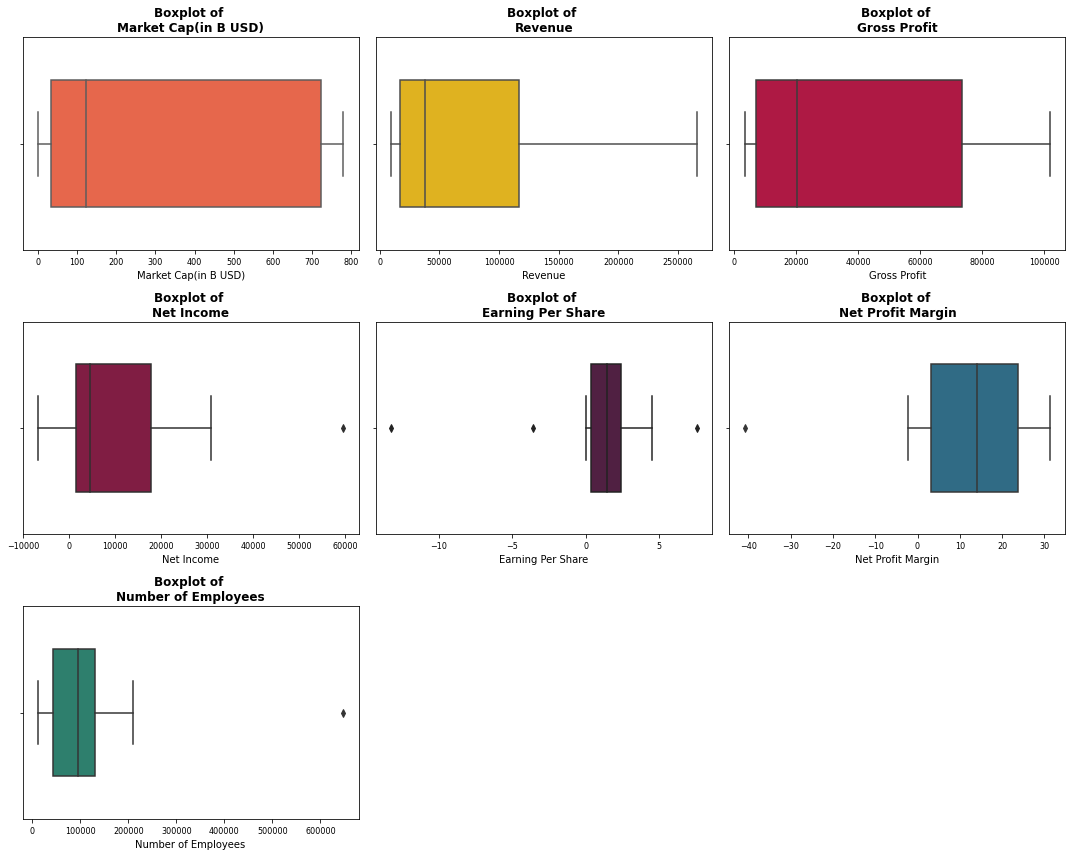

In [1496]:
def visualize_outliers_grid(df):
    numerical_columns = ['Market Cap(in B USD)', 'Revenue',
                         'Gross Profit', 'Net Income', 'Earning Per Share',
                         'Net Profit Margin', 'Number of Employees']
    
    num_cols = 3
    num_rows = (len(numerical_columns) - 1) // num_cols + 1
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))
    
    colors = ['#FF5733', '#FFC300', '#C70039', '#900C3F', '#581845', '#227093', '#218C74']
    sns.set_palette(sns.color_palette(colors))
    
    for i, column in enumerate(numerical_columns):
        row = i // num_cols
        col = i % num_cols
        ax = axes[row, col]
        
        sns.boxplot(x=df[column], ax=ax, palette=[colors[i]], width=0.6)
        ax.set_title(f'Boxplot of \n{column}', fontsize=12, fontweight='bold')
        ax.set_xlabel(column, fontsize=10)
        ax.set_ylabel('', fontsize=10)
        ax.tick_params(axis='both', labelsize=8)
    
    for i in range(len(numerical_columns), num_rows*num_cols):
        row = i // num_cols
        col = i % num_cols
        fig.delaxes(axes[row, col])
    
    plt.tight_layout()
    plt.show()

visualize_outliers_grid(df)

**Refraining** from **dropping or replacing outliers** in the **`Net Income`**, **`Earning Per Share`**, **`Net Profit Margin`**, and `Number of Employees` columns is crucial due to their potential significance in reflecting genuine and exceptional scenarios within the dataset. These outliers might indicate **extreme financial performances** or **unusual operational scales** within companies, holding **valuable insights** essential for analysis and decision-making. 

Retaining outliers ensures the integrity of the dataset, enabling a more **accurate representation** of the **diverse range of companies** and their **financial behaviors**, supporting transparency, and potentially revealing critical patterns that could remain concealed if outliers were removed or altered. However, while preserving outliers, it's essential to acknowledge their potential impact on statistical models and consider robust methodologies to manage their influence appropriately.

### **Check Distribution**

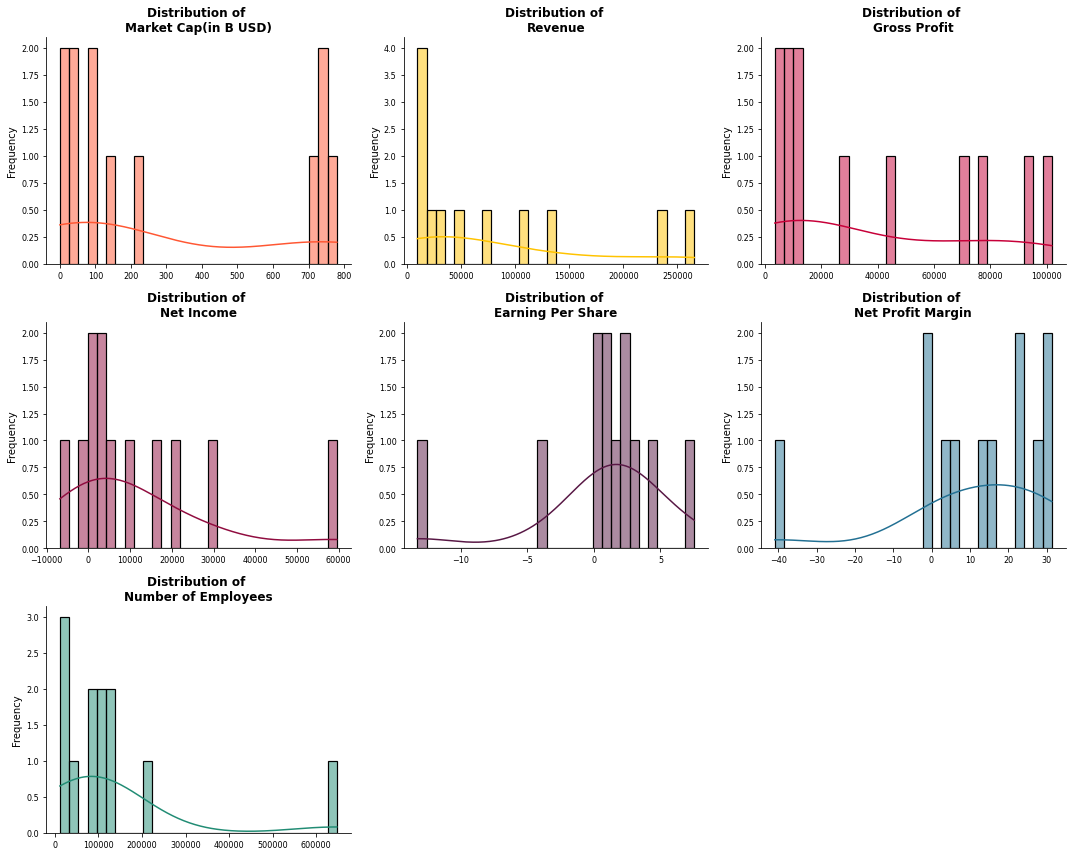

In [1497]:
def visualize_distributions(df):
    numerical_columns = ['Market Cap(in B USD)', 'Revenue',
                         'Gross Profit', 'Net Income', 'Earning Per Share',
                         'Net Profit Margin', 'Number of Employees']
    
    num_cols = 3
    num_rows = (len(numerical_columns) - 1) // num_cols + 1
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))
    
    colors = ['#FF5733', '#FFC300', '#C70039', '#900C3F', '#581845', '#227093', '#218C74']
    sns.set_palette(sns.color_palette(colors))
    
    for i, column in enumerate(numerical_columns):
        row = i // num_cols
        col = i % num_cols
        ax = axes[row, col]
        
        sns.histplot(df[column], ax=ax, kde=True, bins=30, color=colors[i], linewidth=1.2)
        ax.set_title(f'Distribution of \n{column}', fontsize=12, fontweight='bold')
        ax.set_xlabel('')
        ax.set_ylabel('Frequency', fontsize=10)
        ax.tick_params(axis='both', labelsize=8)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
    
    for i in range(len(numerical_columns), num_rows*num_cols):
        row = i // num_cols
        col = i % num_cols
        fig.delaxes(axes[row, col])
    
    plt.tight_layout()
    plt.show()

visualize_distributions(df)

**Skewed distributions** in numerical **financial data** often stem from several inherent factors within the business landscape. These include the presence of outliers, disparities in company sizes or economic conditions, varying business dynamics across sectors, diverse measurement scales, seasonal or cyclical trends affecting financial metrics, and differences in the financial health or performance of companies. Outliers, economic disparities, and unique business characteristics contribute to skewed distributions in metrics such as revenue, profit, market capitalization, and employee counts. Understanding these reasons for skewness is crucial, as it reflects the **complex and varied nature of financial datasets**.

## Categorical

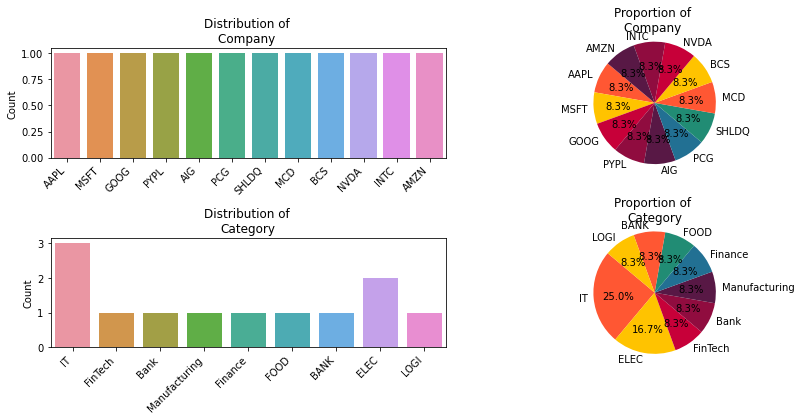

In [1498]:
categorical_columns = ['Company ', 'Category']

fig = plt.figure(figsize=(12, 6))
gs = GridSpec(2, 4, figure=fig)

for i, column in enumerate(categorical_columns):
    ax_bar = fig.add_subplot(gs[i, :2])
    sns.countplot(x=column, data=df, ax=ax_bar)
    ax_bar.set_title(f'Distribution of \n{column}')
    ax_bar.set_xlabel('')
    ax_bar.set_ylabel('Count')
    ax_bar.set_xticklabels(ax_bar.get_xticklabels(), rotation=45, ha='right')
    
for i, column in enumerate(categorical_columns):
    ax_pie = fig.add_subplot(gs[i, 2:])
    category_counts = df[column].value_counts()
    ax_pie.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, radius=1.4)
    ax_pie.set_title(f'Proportion of \n{column}', y=1.1)

plt.tight_layout()
plt.show()

Based on the distribution analysis of the **`Company`** column, an **even distribution** is evident, showcasing an equal count of **1** for each company, suggesting a **uniform** presence across the dataset. In contrast, examining the **`Category`** distribution reveals a varied landscape. The **'IT'** category emerges as the **dominant** category, constituting approximately 25% of the dataset, followed by the **'ELEC'** category with a count of **2**, accounting for roughly 16.7%. Meanwhile, the remaining categories each hold an identical count of 1, representing approximately 8.3% of the dataset. This distribution disparity implies a more concentrated representation of certain categories, particularly 'IT' and 'ELEC,' signifying their relatively higher prevalence compared to other categories within the dataset.

# **Feature Engineering: One Hot Encoding**

I opted for one-hot encoding on the **`Category`** column due to the **absence** of specific **levels or ordinal** relationships within its categories. Each category within **`Category`** stands **independently** without any inherent order or hierarchy, making one-hot encoding an appropriate method to represent these distinct categorical values as binary variables. 

Conversely, for the **`Company`** column, the decision against encoding was based on the **equal count of 1** for each company present in the dataset. Since every company holds an identical count, encoding this column into separate binary variables **wouldn't yield significant impact** or introduce meaningful differentiation, thereby leading to **redundancy** in the representation of the data.

### **`Category`**

In [1499]:
df['Category'].value_counts()

IT               3
ELEC             2
FinTech          1
Bank             1
Manufacturing    1
Finance          1
FOOD             1
BANK             1
LOGI             1
Name: Category, dtype: int64

In [1500]:
category_encoded = pd.get_dummies(df['Category'], prefix='Category')
df = pd.concat([df, category_encoded], axis=1)

In [1501]:
df.head(15)

,Company,Category,Market Cap(in B USD),Revenue,Gross Profit,Net Income,Earning Per Share,Net Profit Margin,Number of Employees,Category_BANK,Category_Bank,Category_ELEC,Category_FOOD,Category_FinTech,Category_Finance,Category_IT,Category_LOGI,Category_Manufacturing
4,AAPL,IT,748.54,265595.00,101839.00,59531.000,2.9800,22.4142,132000,0,0,0,0,0,0,1,0,0
19,MSFT,IT,779.67,110360.00,72007.00,16571.000,2.1300,15.0154,131000,0,0,0,0,0,0,1,0,0
33,GOOG,IT,719.63,136819.00,77270.00,30736.000,2.1850,22.4647,98771,0,0,0,0,0,0,1,0,0
47,PYPL,FinTech,99.09,15451.00,7189.00,2057.000,1.7100,13.3131,21800,0,0,0,0,1,0,0,0,0
56,AIG,Bank,34.86,47389.00,6921.00,-6.000,-0.0100,-0.0127,49600,0,1,0,0,0,0,0,0,0
70,PCG,Manufacturing,5.75,16759.00,12260.00,-6851.000,-13.2500,-40.8795,24000,0,0,0,0,0,0,0,0,1
80,SHLDQ,Finance,0.04,16702.00,3527.00,-383.000,-3.5700,-2.2931,89900,0,0,0,0,0,1,0,0,0
94,MCD,FOOD,148.82,21257.90,10832.60,5924.300,7.5400,27.8687,210000,0,0,0,1,0,0,0,0,0
108,BCS,BANK,31.68,28212.33,28212.33,1860.711,0.4912,7.0877,83500,1,0,0,0,0,0,0,0,0
123,NVDA,ELEC,81.44,9714.00,5822.00,3047.000,1.2050,31.3671,11528,0,0,1,0,0,0,0,0,0


In [1502]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 4 to 151
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Company                 12 non-null     object 
 1   Category                12 non-null     object 
 2   Market Cap(in B USD)    12 non-null     float64
 3   Revenue                 12 non-null     float64
 4   Gross Profit            12 non-null     float64
 5   Net Income              12 non-null     float64
 6   Earning Per Share       12 non-null     float64
 7   Net Profit Margin       12 non-null     float64
 8   Number of Employees     12 non-null     int64  
 9   Category_BANK           12 non-null     uint8  
 10  Category_Bank           12 non-null     uint8  
 11  Category_ELEC           12 non-null     uint8  
 12  Category_FOOD           12 non-null     uint8  
 13  Category_FinTech        12 non-null     uint8  
 14  Category_Finance        12 non-null     uin

# **Feature Scaling**

In [1503]:
df['Market Cap(in B USD)'] = df['Market Cap(in B USD)'] * 1000
df = df.rename(columns={'Market Cap(in B USD)': 'Market Cap'})

df_real['Market Cap(in B USD)'] = df_real['Market Cap(in B USD)'] * 1000
df_real = df_real.rename(columns={'Market Cap(in B USD)': 'Market Cap'})

Converting units to maintain **uniformity** across columns such as **`Revenue`**, **`Gross Profit`**, and **`Net Income`**, which are denominated in **million USD**, is crucial for **consistency** and **comparability** in the dataset. The presence of values in different units might distort or misrepresent the actual relationships between variables during analysis. 

Therefore, it becomes imperative to harmonize the units by converting the **`Market Cap`** column from **billion USD** to **million USD** to ensure an equivalent scale of measurement. This conversion allows for a more coherent and meaningful comparison among the **financial metrics**, facilitating accurate analyses and interpretations by ensuring all values are on the same magnitude and scale, thus preserving the integrity of the dataset.

In [1504]:
df.head(15)

,Company,Category,Market Cap,Revenue,Gross Profit,Net Income,Earning Per Share,Net Profit Margin,Number of Employees,Category_BANK,Category_Bank,Category_ELEC,Category_FOOD,Category_FinTech,Category_Finance,Category_IT,Category_LOGI,Category_Manufacturing
4,AAPL,IT,748540.0,265595.00,101839.00,59531.000,2.9800,22.4142,132000,0,0,0,0,0,0,1,0,0
19,MSFT,IT,779670.0,110360.00,72007.00,16571.000,2.1300,15.0154,131000,0,0,0,0,0,0,1,0,0
33,GOOG,IT,719630.0,136819.00,77270.00,30736.000,2.1850,22.4647,98771,0,0,0,0,0,0,1,0,0
47,PYPL,FinTech,99090.0,15451.00,7189.00,2057.000,1.7100,13.3131,21800,0,0,0,0,1,0,0,0,0
56,AIG,Bank,34860.0,47389.00,6921.00,-6.000,-0.0100,-0.0127,49600,0,1,0,0,0,0,0,0,0
70,PCG,Manufacturing,5750.0,16759.00,12260.00,-6851.000,-13.2500,-40.8795,24000,0,0,0,0,0,0,0,0,1
80,SHLDQ,Finance,40.0,16702.00,3527.00,-383.000,-3.5700,-2.2931,89900,0,0,0,0,0,1,0,0,0
94,MCD,FOOD,148820.0,21257.90,10832.60,5924.300,7.5400,27.8687,210000,0,0,0,1,0,0,0,0,0
108,BCS,BANK,31680.0,28212.33,28212.33,1860.711,0.4912,7.0877,83500,1,0,0,0,0,0,0,0,0
123,NVDA,ELEC,81440.0,9714.00,5822.00,3047.000,1.2050,31.3671,11528,0,0,1,0,0,0,0,0,0


## Using Robust Scaler

Applying a robust scaler to the numerical columns is crucial due to the **presence of outliers**. Outliers, being extreme values, can heavily impact traditional scaling methods based on mean and standard deviation. The robust scaler, using robust statistical measures like median and interquartile range, is **less affected by outliers**. This method ensures that the scaling process is more resilient to outlier influence, preserving accurate data relationships for analysis or modeling. Consequently, the robust scaler **maintains** the **data's integrity**, **minimizing outlier impact** on scaling and **providing more reliable analysis** outcomes.

In [1505]:
columns_to_scale = df.columns[2:9]
scaler = RobustScaler()
df_scaled = df.copy()

df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
df_scaled.head(15)

,Company,Category,Market Cap,Revenue,Gross Profit,Net Income,Earning Per Share,Net Profit Margin,Number of Employees,Category_BANK,Category_Bank,Category_ELEC,Category_FOOD,Category_FinTech,Category_Finance,Category_IT,Category_LOGI,Category_Manufacturing
4,AAPL,IT,0.906164,2.272716,1.232657,3.377540,0.754516,0.400972,0.427763,0,0,0,0,0,0,1,0,0
19,MSFT,IT,0.951328,0.723928,0.782028,0.741548,0.333276,0.041368,0.416405,0,0,0,0,0,0,1,0,0
33,GOOG,IT,0.864221,0.987911,0.861529,1.610701,0.360532,0.403426,0.050375,0,0,0,0,0,0,1,0,0
47,PYPL,FinTech,-0.036075,-0.222984,-0.197085,-0.149020,0.125133,-0.041368,-0.823799,0,0,0,0,1,0,0,0,0
56,AIG,Bank,-0.129261,0.095663,-0.201133,-0.275604,-0.727259,-0.689041,-0.508069,0,1,0,0,0,0,0,0,0
70,PCG,Manufacturing,-0.171495,-0.209934,-0.120485,-0.695608,-7.288698,-2.675286,-0.798813,0,0,0,0,0,0,0,0,1
80,SHLDQ,Finance,-0.179779,-0.210502,-0.252401,-0.298737,-2.491513,-0.799875,-0.050375,0,0,0,0,0,1,0,0,0
94,MCD,FOOD,0.036075,-0.165048,-0.142046,0.088274,3.014347,0.666076,1.313623,0,0,0,1,0,0,0,0,0
108,BCS,BANK,-0.133875,-0.095663,0.120485,-0.161064,-0.478876,-0.343941,-0.123061,1,0,0,0,0,0,0,0,0
123,NVDA,ELEC,-0.061682,-0.280222,-0.217734,-0.088274,-0.125133,0.836109,-0.940460,0,0,1,0,0,0,0,0,0


In [1506]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 4 to 151
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Company                 12 non-null     object 
 1   Category                12 non-null     object 
 2   Market Cap              12 non-null     float64
 3   Revenue                 12 non-null     float64
 4   Gross Profit            12 non-null     float64
 5   Net Income              12 non-null     float64
 6   Earning Per Share       12 non-null     float64
 7   Net Profit Margin       12 non-null     float64
 8   Number of Employees     12 non-null     float64
 9   Category_BANK           12 non-null     uint8  
 10  Category_Bank           12 non-null     uint8  
 11  Category_ELEC           12 non-null     uint8  
 12  Category_FOOD           12 non-null     uint8  
 13  Category_FinTech        12 non-null     uint8  
 14  Category_Finance        12 non-null     uin

### **Slicing Column for Cluster Model**

Identify the columns selected for the subsequent clustering analysis.

In [1507]:
selected_columns = df_scaled.iloc[:, list(range(2, 18))]
df_scaled_cluster = selected_columns.copy()

selected_columns = df.iloc[:, list(range(2, 18))]
df_cluster = selected_columns.copy()

In [1508]:
df_cluster.head(15)

,Market Cap,Revenue,Gross Profit,Net Income,Earning Per Share,Net Profit Margin,Number of Employees,Category_BANK,Category_Bank,Category_ELEC,Category_FOOD,Category_FinTech,Category_Finance,Category_IT,Category_LOGI,Category_Manufacturing
4,748540.0,265595.00,101839.00,59531.000,2.9800,22.4142,132000,0,0,0,0,0,0,1,0,0
19,779670.0,110360.00,72007.00,16571.000,2.1300,15.0154,131000,0,0,0,0,0,0,1,0,0
33,719630.0,136819.00,77270.00,30736.000,2.1850,22.4647,98771,0,0,0,0,0,0,1,0,0
47,99090.0,15451.00,7189.00,2057.000,1.7100,13.3131,21800,0,0,0,0,1,0,0,0,0
56,34860.0,47389.00,6921.00,-6.000,-0.0100,-0.0127,49600,0,1,0,0,0,0,0,0,0
70,5750.0,16759.00,12260.00,-6851.000,-13.2500,-40.8795,24000,0,0,0,0,0,0,0,0,1
80,40.0,16702.00,3527.00,-383.000,-3.5700,-2.2931,89900,0,0,0,0,0,1,0,0,0
94,148820.0,21257.90,10832.60,5924.300,7.5400,27.8687,210000,0,0,0,1,0,0,0,0,0
108,31680.0,28212.33,28212.33,1860.711,0.4912,7.0877,83500,1,0,0,0,0,0,0,0,0
123,81440.0,9714.00,5822.00,3047.000,1.2050,31.3671,11528,0,0,1,0,0,0,0,0,0


In [1509]:
df_scaled_cluster.head(15)

,Market Cap,Revenue,Gross Profit,Net Income,Earning Per Share,Net Profit Margin,Number of Employees,Category_BANK,Category_Bank,Category_ELEC,Category_FOOD,Category_FinTech,Category_Finance,Category_IT,Category_LOGI,Category_Manufacturing
4,0.906164,2.272716,1.232657,3.377540,0.754516,0.400972,0.427763,0,0,0,0,0,0,1,0,0
19,0.951328,0.723928,0.782028,0.741548,0.333276,0.041368,0.416405,0,0,0,0,0,0,1,0,0
33,0.864221,0.987911,0.861529,1.610701,0.360532,0.403426,0.050375,0,0,0,0,0,0,1,0,0
47,-0.036075,-0.222984,-0.197085,-0.149020,0.125133,-0.041368,-0.823799,0,0,0,0,1,0,0,0,0
56,-0.129261,0.095663,-0.201133,-0.275604,-0.727259,-0.689041,-0.508069,0,1,0,0,0,0,0,0,0
70,-0.171495,-0.209934,-0.120485,-0.695608,-7.288698,-2.675286,-0.798813,0,0,0,0,0,0,0,0,1
80,-0.179779,-0.210502,-0.252401,-0.298737,-2.491513,-0.799875,-0.050375,0,0,0,0,0,1,0,0,0
94,0.036075,-0.165048,-0.142046,0.088274,3.014347,0.666076,1.313623,0,0,0,1,0,0,0,0,0
108,-0.133875,-0.095663,0.120485,-0.161064,-0.478876,-0.343941,-0.123061,1,0,0,0,0,0,0,0,0
123,-0.061682,-0.280222,-0.217734,-0.088274,-0.125133,0.836109,-0.940460,0,0,1,0,0,0,0,0,0


# **Clustering: K-Means**

The rationale behind choosing the **K-Means clustering** method for the dataset described earlier lies in several factors aligning with the nature of the data and the characteristics of K-Means clustering. Firstly, K-Means is **suitable for numeric data**, making it apt for the numerical features present in the dataset, such as `Market Cap (in M USD)`, `Revenue`, `Gross Profit`, `Net Income`, `Earning Per Share`, `Net Profit Margin`, and `Number of Employees`. 

Additionally, the dataset does not require prior knowledge of cluster numbers, and K-Means allows us to **explore inherent patterns** or groupings within the data, which aligns well with the objective of uncovering inherent structures or **similarities** among companies based on their **financial attributes**. Overall, K-Means clustering presents an appropriate choice given the dataset's numerical nature, the desire to identify natural groupings within the data, and the need for a scalable and straightforward clustering method.

### Using Scaled Column

In [1510]:
distortions = []
K = range(2,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    cluster_label=kmeanModel.fit_predict(df_scaled_cluster)

    silhouette_avg = silhouette_score(df_scaled_cluster, cluster_label)
    print(
        "For n_clusters =",k,
        "The average silhouette_score is :",silhouette_avg,
        )
    
    distortions.append(kmeanModel.inertia_)

For n_clusters = 2 The average silhouette_score is : 0.48138235311436334
For n_clusters = 3 The average silhouette_score is : 0.42069915035438826
For n_clusters = 4 The average silhouette_score is : 0.26571469321328
For n_clusters = 5 The average silhouette_score is : 0.2929190540718161
For n_clusters = 6 The average silhouette_score is : 0.23288416535411752
For n_clusters = 7 The average silhouette_score is : 0.16478302758762695
For n_clusters = 8 The average silhouette_score is : 0.17182026939867423
For n_clusters = 9 The average silhouette_score is : 0.14565996797314726


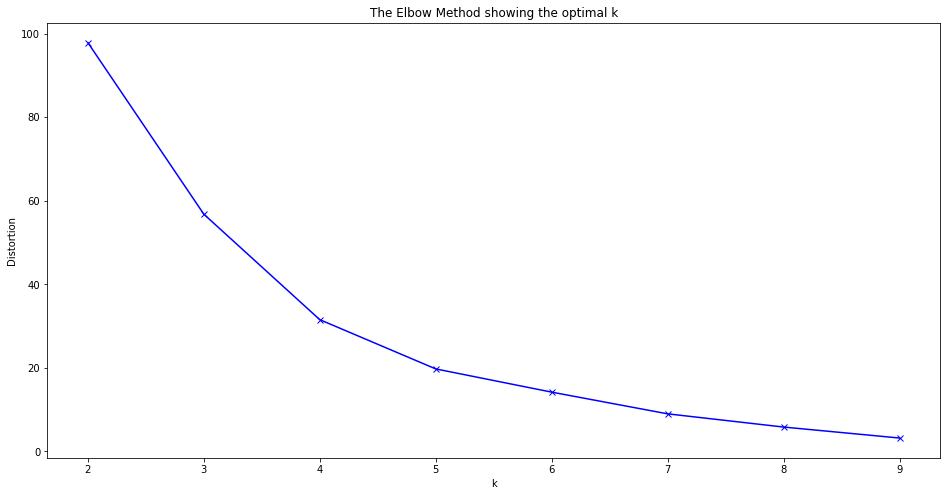

In [1511]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [1512]:
#Based on silhouette score and elbow method cluster 2 is the best one
kmeanModel = KMeans(n_clusters=2)
kmeanModel.fit(df_scaled_cluster)

KMeans(n_clusters=2)

In [1513]:
df_real['k_means']=kmeanModel.predict(df_scaled_cluster)

In [1514]:
df_real['k_means'].value_counts()

1    11
0     1
Name: k_means, dtype: int64

In [1515]:
df_real.head(15)

,Company,Category,Market Cap,Revenue,Gross Profit,Net Income,Earning Per Share,Net Profit Margin,Number of Employees,k_means
4,AAPL,IT,748540.0,265595.00,101839.00,59531.000,2.9800,22.4142,132000,1
19,MSFT,IT,779670.0,110360.00,72007.00,16571.000,2.1300,15.0154,131000,1
33,GOOG,IT,719630.0,136819.00,77270.00,30736.000,2.1850,22.4647,98771,1
47,PYPL,FinTech,99090.0,15451.00,7189.00,2057.000,1.7100,13.3131,21800,1
56,AIG,Bank,34860.0,47389.00,6921.00,-6.000,-0.0100,-0.0127,49600,1
70,PCG,Manufacturing,5750.0,16759.00,12260.00,-6851.000,-13.2500,-40.8795,24000,0
80,SHLDQ,Finance,40.0,16702.00,3527.00,-383.000,-3.5700,-2.2931,89900,1
94,MCD,FOOD,148820.0,21257.90,10832.60,5924.300,7.5400,27.8687,210000,1
108,BCS,BANK,31680.0,28212.33,28212.33,1860.711,0.4912,7.0877,83500,1
123,NVDA,ELEC,81440.0,9714.00,5822.00,3047.000,1.2050,31.3671,11528,1


The suboptimal **silhouette score below 0.5** and the **uneven distribution** of clusters, particularly for k=2 (where one cluster contains the majority of the data and the other has only one data point), arise when using numerical columns that underwent robust scaling. This could be attributed to the impact of scaling on the relative distances and patterns within the dataset. However, in certain cases, scaling may **alter the data's inherent structure**, leading to **inadequate cluster separation** or obscuring patterns that are vital for clustering algorithms. In the context of the dataset described earlier, where financial metrics like market cap, revenue, and profit **vary significantly between companies**, robust scaling might **compress these differences**, affecting the clustering performance negatively.

### **Without Using Scaled Column**

The need to revert to using the **original, unscaled numerical columns** stems from the inherent characteristics of the financial dataset. **Financial metrics**, by nature, showcase **varying scales** and **magnitudes** between companies due to their distinct **financial positions** and **market standings**. Employing scaled data, particularly via robust scaling, may unintentionally diminish or alter these crucial differences, potentially obscuring significant patterns required for clustering.

Therefore, utilizing the raw, unscaled numerical columns preserves the diverse scales and magnitudes present in financial metrics, enabling the clustering algorithm to discern meaningful differences between companies based on their financial performance accurately. This approach helps **maintain the integrity of the financial data's** inherent structures, allowing clustering algorithms to **capture essential variations** in financial attributes effectively.

In [1516]:
distortions = []
K = range(2,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    cluster_label=kmeanModel.fit_predict(df_cluster)

    silhouette_avg = silhouette_score(df_cluster, cluster_label)
    print(
        "For n_clusters =",k,
        "The average silhouette_score is :",silhouette_avg,
        )
    
    distortions.append(kmeanModel.inertia_)

For n_clusters = 2 The average silhouette_score is : 0.7368249767547449
For n_clusters = 3 The average silhouette_score is : 0.7290577947607785
For n_clusters = 4 The average silhouette_score is : 0.5575044182445549
For n_clusters = 5 The average silhouette_score is : 0.45265097931079684
For n_clusters = 6 The average silhouette_score is : 0.3842832644113286
For n_clusters = 7 The average silhouette_score is : 0.341503170543255
For n_clusters = 8 The average silhouette_score is : 0.2561756236051603
For n_clusters = 9 The average silhouette_score is : 0.1976506407529648


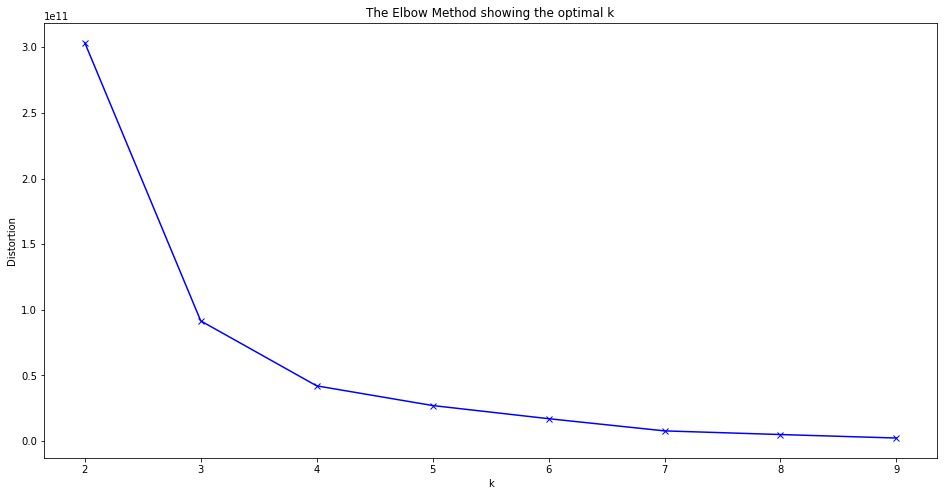

In [1517]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [1518]:
#Based on silhouette score and elbow method cluster 2 is the best one
kmeanModel = KMeans(n_clusters=2)
kmeanModel.fit(df_cluster)

KMeans(n_clusters=2)

In [1519]:
df_real['k_means']=kmeanModel.predict(df_cluster)

In [1520]:
df_real['k_means'].value_counts()

1    8
0    4
Name: k_means, dtype: int64

In [1521]:
df_real.head(15)

,Company,Category,Market Cap,Revenue,Gross Profit,Net Income,Earning Per Share,Net Profit Margin,Number of Employees,k_means
4,AAPL,IT,748540.0,265595.00,101839.00,59531.000,2.9800,22.4142,132000,0
19,MSFT,IT,779670.0,110360.00,72007.00,16571.000,2.1300,15.0154,131000,0
33,GOOG,IT,719630.0,136819.00,77270.00,30736.000,2.1850,22.4647,98771,0
47,PYPL,FinTech,99090.0,15451.00,7189.00,2057.000,1.7100,13.3131,21800,1
56,AIG,Bank,34860.0,47389.00,6921.00,-6.000,-0.0100,-0.0127,49600,1
70,PCG,Manufacturing,5750.0,16759.00,12260.00,-6851.000,-13.2500,-40.8795,24000,1
80,SHLDQ,Finance,40.0,16702.00,3527.00,-383.000,-3.5700,-2.2931,89900,1
94,MCD,FOOD,148820.0,21257.90,10832.60,5924.300,7.5400,27.8687,210000,1
108,BCS,BANK,31680.0,28212.33,28212.33,1860.711,0.4912,7.0877,83500,1
123,NVDA,ELEC,81440.0,9714.00,5822.00,3047.000,1.2050,31.3671,11528,1


In [1522]:
cluster_0=df_real[df_real['k_means']==0]

In [1523]:
cluster_1=df_real[df_real['k_means']==1]

# **Persona Analysis**

### I will provide a comprehensive explanation of persona analysis in the accompanying PDF file, which I'll submit along with this notebook for the assignment.

## **Cluster 0**

In [1524]:
cluster_0.columns

Index(['Company ', 'Category', 'Market Cap', 'Revenue', 'Gross Profit',
       'Net Income', 'Earning Per Share', 'Net Profit Margin',
       'Number of Employees', 'k_means'],
      dtype='object')

In [1525]:
cluster_0.head(15)

,Company,Category,Market Cap,Revenue,Gross Profit,Net Income,Earning Per Share,Net Profit Margin,Number of Employees,k_means
4,AAPL,IT,748540.0,265595.0,101839.0,59531.0,2.980,22.4142,132000,0
19,MSFT,IT,779670.0,110360.0,72007.0,16571.0,2.130,15.0154,131000,0
33,GOOG,IT,719630.0,136819.0,77270.0,30736.0,2.185,22.4647,98771,0
151,AMZN,LOGI,734420.0,232887.0,93731.0,10073.0,1.007,4.3253,647500,0


In [1526]:
cluster_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 4 to 151
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              4 non-null      object 
 1   Category             4 non-null      object 
 2   Market Cap           4 non-null      float64
 3   Revenue              4 non-null      float64
 4   Gross Profit         4 non-null      float64
 5   Net Income           4 non-null      float64
 6   Earning Per Share    4 non-null      float64
 7   Net Profit Margin    4 non-null      float64
 8   Number of Employees  4 non-null      int64  
 9   k_means              4 non-null      int32  
dtypes: float64(6), int32(1), int64(1), object(2)
memory usage: 336.0+ bytes


In [1527]:
cluster_0.describe()

,Market Cap,Revenue,Gross Profit,Net Income,Earning Per Share,Net Profit Margin,Number of Employees,k_means
count,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.0000,4.0
mean,745565.00000,186415.250000,86211.750000,29227.750000,2.075500,16.054900,252317.7500,0.0
std,25617.94228,74550.308349,13934.129308,21967.093168,0.811331,8.567191,263906.5318,0.0
min,719630.00000,110360.000000,72007.000000,10073.000000,1.007000,4.325300,98771.0000,0.0
25%,730722.50000,130204.250000,75954.250000,14946.500000,1.849250,12.342875,122942.7500,0.0
50%,741480.00000,184853.000000,85500.500000,23653.500000,2.157500,18.714800,131500.0000,0.0
75%,756322.50000,241064.000000,95758.000000,37934.750000,2.383750,22.426825,260875.0000,0.0
max,779670.00000,265595.000000,101839.000000,59531.000000,2.980000,22.464700,647500.0000,0.0


In [1528]:
cluster_0['Company '].value_counts()

AAPL    1
MSFT    1
GOOG    1
AMZN    1
Name: Company , dtype: int64

In [1529]:
cluster_0['Category'].value_counts()

IT      3
LOGI    1
Name: Category, dtype: int64

## **Cluster 1**

In [1530]:
cluster_1.columns

Index(['Company ', 'Category', 'Market Cap', 'Revenue', 'Gross Profit',
       'Net Income', 'Earning Per Share', 'Net Profit Margin',
       'Number of Employees', 'k_means'],
      dtype='object')

In [1531]:
cluster_1.head(15)

,Company,Category,Market Cap,Revenue,Gross Profit,Net Income,Earning Per Share,Net Profit Margin,Number of Employees,k_means
47,PYPL,FinTech,99090.0,15451.00,7189.00,2057.000,1.7100,13.3131,21800,1
56,AIG,Bank,34860.0,47389.00,6921.00,-6.000,-0.0100,-0.0127,49600,1
70,PCG,Manufacturing,5750.0,16759.00,12260.00,-6851.000,-13.2500,-40.8795,24000,1
80,SHLDQ,Finance,40.0,16702.00,3527.00,-383.000,-3.5700,-2.2931,89900,1
94,MCD,FOOD,148820.0,21257.90,10832.60,5924.300,7.5400,27.8687,210000,1
108,BCS,BANK,31680.0,28212.33,28212.33,1860.711,0.4912,7.0877,83500,1
123,NVDA,ELEC,81440.0,9714.00,5822.00,3047.000,1.2050,31.3671,11528,1
137,INTC,ELEC,214190.0,70848.00,43737.00,21053.000,4.4800,29.7157,107400,1


In [1532]:
cluster_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 47 to 137
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              8 non-null      object 
 1   Category             8 non-null      object 
 2   Market Cap           8 non-null      float64
 3   Revenue              8 non-null      float64
 4   Gross Profit         8 non-null      float64
 5   Net Income           8 non-null      float64
 6   Earning Per Share    8 non-null      float64
 7   Net Profit Margin    8 non-null      float64
 8   Number of Employees  8 non-null      int64  
 9   k_means              8 non-null      int32  
dtypes: float64(6), int32(1), int64(1), object(2)
memory usage: 672.0+ bytes


In [1533]:
cluster_1.describe()

,Market Cap,Revenue,Gross Profit,Net Income,Earning Per Share,Net Profit Margin,Number of Employees,k_means
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.0
mean,76983.750000,28291.653750,14812.616250,3337.751375,-0.175475,8.270875,74716.000000,1.0
std,74943.763857,20710.815008,13975.090746,8046.845833,6.205994,23.905138,65108.118361,0.0
min,40.000000,9714.000000,3527.000000,-6851.000000,-13.250000,-40.879500,11528.000000,1.0
25%,25197.500000,16389.250000,6646.250000,-100.250000,-0.900000,-0.582800,23450.000000,1.0
50%,58150.000000,19008.450000,9010.800000,1958.855500,0.848100,10.200400,66550.000000,1.0
75%,111522.500000,33006.497500,16248.082500,3766.325000,2.402500,28.330450,94275.000000,1.0
max,214190.000000,70848.000000,43737.000000,21053.000000,7.540000,31.367100,210000.000000,1.0


In [1534]:
cluster_1['Company '].value_counts()

PYPL     1
AIG      1
PCG      1
SHLDQ    1
MCD      1
BCS      1
NVDA     1
INTC     1
Name: Company , dtype: int64

In [1535]:
cluster_1['Category'].value_counts()

ELEC             2
FinTech          1
Bank             1
Manufacturing    1
Finance          1
FOOD             1
BANK             1
Name: Category, dtype: int64